In [2]:
#| label: california-housing
#| fig-cap: "Fig 1- California housing Dataset"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter("ignore")

# Loading pre-defined California housing Dataset
california_housing = fetch_california_housing(as_frame=True)

# Load the dataset into Pandas Dataframe
california_housing_data = pd.DataFrame(california_housing.frame)
california_housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
#| label: feature_target_split

# Splitting data into input features and target variables
X = california_housing_data.iloc[:,0:8].values
y = california_housing_data.iloc[:,-1].values

# Standardizing input data using Standard Scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
#| label: feature_train__test_split
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [5]:
#| label: LR
# Training linear regression model on train data
LR = LinearRegression()

LR.fit(X_train,y_train)

LinearRegression()

In [6]:
#| label: Residuals
# Finding Residuals which are the difference between the actual target value and the target value predicted
# by the linear regression model

y_pred = LR.predict(X_test)
residual = y_test - y_pred

1- To check Linear relationship between input and output variables

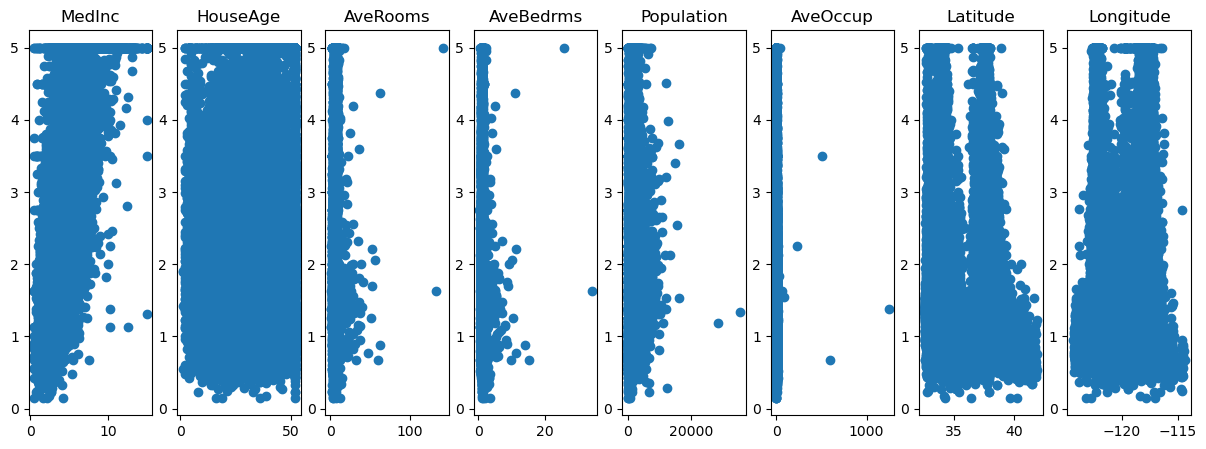

In [7]:
#| label: Linear_relationship
#| fig-cap: "Fig 2- Linear relationship test between input and output variables"

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(ncols=8, figsize=(15, 5))

ax1.scatter(california_housing_data['MedInc'], california_housing_data['MedHouseVal'])
ax1.set_title("MedInc")
ax2.scatter(california_housing_data['HouseAge'], california_housing_data['MedHouseVal'])
ax2.set_title("HouseAge")
ax3.scatter(california_housing_data['AveRooms'], california_housing_data['MedHouseVal'])
ax3.set_title("AveRooms")
ax4.scatter(california_housing_data['AveBedrms'], california_housing_data['MedHouseVal'])
ax4.set_title("AveBedrms")
ax5.scatter(california_housing_data['Population'], california_housing_data['MedHouseVal'])
ax5.set_title("Population")
ax6.scatter(california_housing_data['AveOccup'], california_housing_data['MedHouseVal'])
ax6.set_title("AveOccup")
ax7.scatter(california_housing_data['Latitude'], california_housing_data['MedHouseVal'])
ax7.set_title("Latitude")
ax8.scatter(california_housing_data['Longitude'], california_housing_data['MedHouseVal'])
ax8.set_title("Longitude")


plt.show()

Note- From the above plots we can see that none of the input features have a strong linear relationship with the target variable. The feature MedInc does have some linear relationship with the target variable but not a strong linear relationship.

We can make transformations to the input features like log transformation,power transformation etc so that we meet this assumption.

2- Multicollinearity check

Variance Inflation Factor (VIF)

There are several ways to detect multicollinearity in a dataset. One such technique is called the Variance Inflation Factor (VIF).

VIF determines the strength of the correlation between the independent variables or the input features. VIF is predicted by taking a variable and regressing it against every other variable.

VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF can takes from 1 and has no upper limit.

If VIF = 1 there is no correlation between the independent variable and the other variables.

VIF exceeding 5 or 10 indicates high multicollinearity between the independent variable and the other independent variables.


In [8]:
#| label: VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Python list to store VIF for each of the features
vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))
    
pd.DataFrame({'vif': vif}, index=california_housing_data.columns[0:8]).T

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
vif,2.592546,1.247793,8.616084,7.07929,1.144284,1.011484,9.379948,9.010217


Note- We can see that the features AveRooms, AveBedrms, Latitude and Longitude have a high VIF value and hence they can be predicted by other independent variables in the dataset. Hence multicollinearity exists in our dataset.

3- Checking normality of residuals


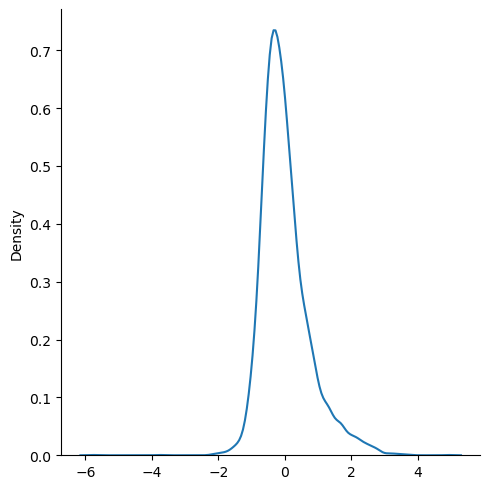

In [9]:
#| label: residuals_normality
#| fig-cap: "Fig 3- Checking normality of residuals"

sns.displot(residual,kind='kde')

Note from the above plot we can see that the residuals are approxiamately normally distributed and the assumption of normality os residuals holds.

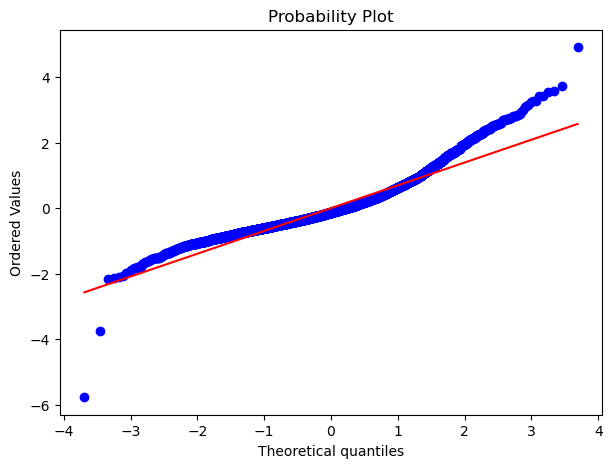

In [10]:
#| label: QQ_Plot
#| fig-cap: "Fig 4- Checking normality of residuals using QQ plot"

# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(7,5))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

The normal quantile plot is obtained byplotting residuals against theoretical quantiles of the standard normal distribution. From the above plot we can see that the residuals are close to the 45 degrees line and hence the residuals can be considered to be from normal distribution.

4- Homoscedasticity (Equal variances): Residuals have constant variance across the values of the dependent variables.

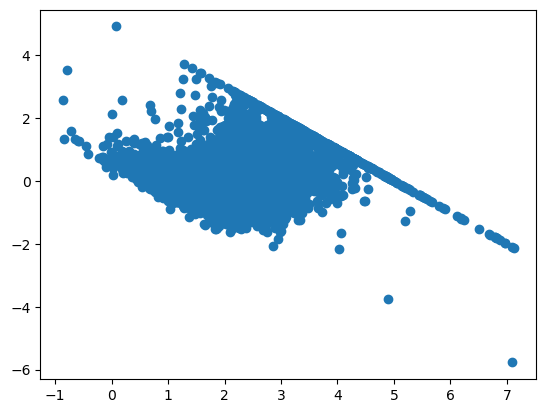

In [11]:
#| label: Homoscedasticity
#| fig-cap: "Fig 5- Checking assumption of Homoscedasticity"

plt.scatter(y_pred,residual)

Observations-
To check Homoscedasticity we plot residuals against predicted values. If we see a haphazard cloud of points our homoscedasticity assumption is met else if we see patterns it suggests non-linearity and/or heteroscedasticity (unequal variances).

From the above plot we can see that our Homoscedasticity assumption of linear regression has not met and we have heteroscedasticity (unequal variances).